# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

# 6 неделя

In [ ]:
!rm -r sample_data

In [ ]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [ ]:
import os            # для работы с операционной системой
import pickle as pkl # для сохранения и загрузки переменных
import pandas as pd  # для работы с таблицами
import numpy  as np  # для работы с массивами
import re            # для работы с регулярными выражениями
import whisper       # для транскрибации

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## [Классификация текста с использованием моделей трансформеров](https://habr.com/ru/articles/655517/)

In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 84.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.9 MB/s eta 0:00:00


### Данные

In [ ]:
# Загрузка датафрейма с данными о звонках
with open(df_path + 'total_work_df.pkl', 'rb') as f:
  total_work_df = pkl.load(f)

In [ ]:
df = df[['Текст whisper-транскрибации записи звонка', 'Класс']][df['Файл записи звонка'] != 'нет файла']

In [ ]:
from sklearn.model_selection import train_test_split
tr_df, val_df     = train_test_split(df,    test_size=0.2,  random_state=42, stratify=df['Класс'])
train_df, test_df = train_test_split(tr_df, test_size=0.25, random_state=42, stratify=tr_df['Класс'])
train_df.shape[0], val_df.shape[0], test_df.shape[0]

(4152, 1385, 1384)

In [ ]:
import torch
from   torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler
from   transformers     import BertTokenizer

train_text       = train_df['Текст whisper-транскрибации записи звонка'].astype('str')
train_labels     = train_df['Класс']
val_text         = val_df  ['Текст whisper-транскрибации записи звонка'].astype('str')
val_labels       = val_df  ['Класс']
test_text        = test_df ['Текст whisper-транскрибации записи звонка'].astype('str')
test_labels      = test_df ['Класс']

tokenizer        = BertTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

tokens_train     = tokenizer.batch_encode_plus(train_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_val       = tokenizer.batch_encode_plus(val_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

tokens_test      = tokenizer.batch_encode_plus(test_text.values,
                                           max_length=512,
                                           padding='max_length',
                                           truncation=True)

train_seq        = torch.tensor(tokens_train['input_ids'])
train_mask       = torch.tensor(tokens_train['attention_mask'])
train_y          = torch.tensor(train_labels.values)

val_seq          = torch.tensor(tokens_val['input_ids'])
val_mask         = torch.tensor(tokens_val['attention_mask'])
val_y            = torch.tensor(val_labels.values)

test_seq         = torch.tensor(tokens_test['input_ids'])
test_mask        = torch.tensor(tokens_test['attention_mask'])
test_y           = torch.tensor(test_labels.values)

batch_size       = 8

train_data       = TensorDataset(train_seq, train_mask, train_y)
train_sampler    = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler = train_sampler, batch_size = batch_size)

val_data         = TensorDataset(val_seq, val_mask, val_y)
val_sampler      = SequentialSampler(val_data)
val_dataloader   = DataLoader(val_data, sampler = val_sampler, batch_size = batch_size)

<Axes: >

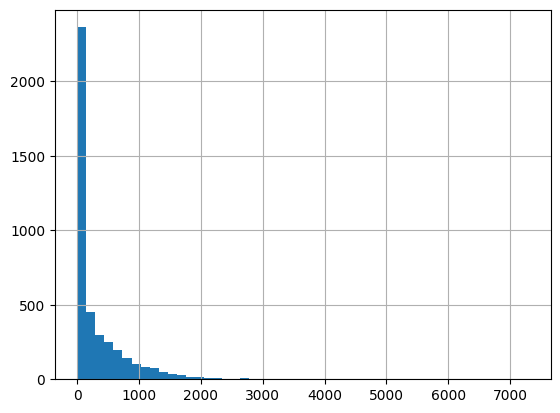

In [ ]:
seq_len = [len(str(i).split()) for i in train_text]
pd.Series(seq_len).hist(bins = 50)

### Модель

In [ ]:
from transformers import AutoModel
bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
for param in bert.parameters():
  param.requires_grad = False

In [ ]:
import torch.nn as nn

class BERT_Arch(nn.Module):

  def __init__(self, bert):
    super(BERT_Arch, self).__init__()
    self.bert = bert
    self.dropout = nn.Dropout(0.1)
    self.relu = nn.ReLU()
    self.fc1 = nn.Linear(768,512)
    self.fc2 = nn.Linear(512,2)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, sent_id, mask):
    _, cls_hs = self.bert(sent_id, attention_mask = mask, return_dict = False)
    x = self.fc1(cls_hs)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.softmax(x)
    return x

In [ ]:
device = torch.device('cuda')
model  = BERT_Arch(bert)
model  = model.to(device)

In [ ]:
import numpy as np
from   sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
print(class_weights)

[0.7446198  1.52199413]


In [ ]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=1e-3)

In [ ]:
cross_entropy = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm
def train():
  model.train()
  total_loss, total_accuracy = 0, 0
  total_preds = []

  for step, batch in tqdm(enumerate(train_dataloader), total = len(train_dataloader)):
    batch = [r.to(device) for r in batch]
    sent_id,mask,labels = batch
    model.zero_grad()
    preds = model(sent_id, mask)
    loss = cross_entropy(preds, labels)
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    preds = preds.detach().cpu().numpy()
    total_preds.append(preds)

  avg_loss = total_loss / len(train_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [ ]:
def evaluate():
  model.eval()

  total_loss, total_accuracy = 0,0
  total_preds = []

  for step, batch in tqdm(enumerate(val_dataloader), total = len(val_dataloader)):
    batch = [t.to(device) for t in batch]
    sent_id, mask, labels = batch

    with torch.no_grad():
      preds = model(sent_id, mask)
      loss = cross_entropy(preds, labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)

  avg_loss = total_loss / len(val_dataloader)
  total_preds = np.concatenate(total_preds, axis = 0)

  return avg_loss, total_preds

In [ ]:
bert.cuda()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
epochs          = 25
best_valid_loss = float('inf')
best_loss       = float('inf')

train_losses    = []
valid_losses    = []

for epoch in range(epochs):
  print('\n Epoch{:} / {:}'.format(epoch+1, epochs))

  train_loss, _ = train()
  valid_loss, _ = evaluate()

  if valid_loss < best_valid_loss:
    best_valid_loss = valid_loss
    torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')
  if valid_loss == best_valid_loss:
    if train_loss < best_loss:
      best_loss = train_loss
      torch.save(model.state_dict(), '/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt')

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)
  print(f'\nTraining loss: {train_loss:.3f}')
  print(f'Validation loss: {valid_loss:.3f}')


 Epoch1 / 25


100%|██████████| 174/174 [00:43<00:00,  4.01it/s]



Training loss: 0.373
Validation loss: 0.312

 Epoch2 / 25


100%|██████████| 174/174 [00:45<00:00,  3.84it/s]



Training loss: 0.345
Validation loss: 0.304

 Epoch3 / 25


100%|██████████| 174/174 [00:44<00:00,  3.88it/s]



Training loss: 0.337
Validation loss: 0.310

 Epoch4 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.325
Validation loss: 0.298

 Epoch5 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.331
Validation loss: 0.311

 Epoch6 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.324
Validation loss: 0.288

 Epoch7 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.320
Validation loss: 0.285

 Epoch8 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.316
Validation loss: 0.299

 Epoch9 / 25


100%|██████████| 174/174 [00:45<00:00,  3.87it/s]



Training loss: 0.311
Validation loss: 0.365

 Epoch10 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.316
Validation loss: 0.287

 Epoch11 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.307
Validation loss: 0.279

 Epoch12 / 25


100%|██████████| 174/174 [00:44<00:00,  3.88it/s]



Training loss: 0.304
Validation loss: 0.284

 Epoch13 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.307
Validation loss: 0.289

 Epoch14 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.301
Validation loss: 0.301

 Epoch15 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.302
Validation loss: 0.277

 Epoch16 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.298
Validation loss: 0.283

 Epoch17 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.303
Validation loss: 0.289

 Epoch18 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.294
Validation loss: 0.304

 Epoch19 / 25


100%|██████████| 174/174 [00:44<00:00,  3.87it/s]



Training loss: 0.291
Validation loss: 0.305

 Epoch20 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.296
Validation loss: 0.282

 Epoch21 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.293
Validation loss: 0.295

 Epoch22 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.294
Validation loss: 0.295

 Epoch23 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]



Training loss: 0.298
Validation loss: 0.294

 Epoch24 / 25


100%|██████████| 174/174 [00:45<00:00,  3.85it/s]



Training loss: 0.296
Validation loss: 0.280

 Epoch25 / 25


100%|██████████| 174/174 [00:45<00:00,  3.86it/s]


Training loss: 0.293
Validation loss: 0.296


### Тест

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/media108.ru/Модели/bert_saved_weights.pt'))

<All keys matched successfully>

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

list_seq  = np.array_split(test_seq, 50)
list_mask = np.array_split(test_mask, 50)

predictions = []

for num, elem in enumerate(list_seq):
  with torch.no_grad():
    preds = model(elem.to(device), list_mask[num].to(device))
    predictions.append(preds.detach().cpu().numpy())

In [ ]:
flat_preds = [item[1] for sublist in predictions for item in sublist]
flat_preds = (flat_preds - min(flat_preds)) / (max(flat_preds) - min(flat_preds))
test_df['Предсказание класса'] = flat_preds

In [ ]:
# Порог 0.95
from sklearn.metrics import classification_report
test_df['Предсказание класса'] = test_df['Предсказание класса'].apply(lambda x: 1 if x > 0.95 else 0)
print(classification_report(test_df['Класс'], test_df['Предсказание класса']))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       930
           1       0.80      0.85      0.83       454

    accuracy                           0.88      1384
   macro avg       0.87      0.88      0.87      1384
weighted avg       0.89      0.88      0.88      1384



In [ ]:
# Порог 0.93
test_df['Предсказание класса'] = test_df['Предсказание класса'].apply(lambda x: 1 if x > 0.93 else 0)
print(classification_report(test_df['Класс'], test_df['Предсказание класса']))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       930
           1       0.77      0.93      0.84       454

    accuracy                           0.89      1384
   macro avg       0.87      0.90      0.88      1384
weighted avg       0.90      0.89      0.89      1384

